##The dataset

**Dataset file name:** chronic_kidney_disease.csv

**Attribute Information:** 

There are 24 features + class = 25 attributes
1.  Age(numerical): age in years
2.Blood Pressure (numerical): bp in mm/Hg
3.Specific Gravity (categorical): sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin (categorical): al - (0,1,2,3,4,5)
5.Sugar (categorical): su - (0,1,2,3,4,5)
6.Red Blood Cells (categorial): rbc - (0, 1)
7.Pus Cell (categorical): pc - (0, 1)
8.Pus Cell clumps (categorical): pcc - (0, 1)
9.Bacteria (categorical): ba - (0, 1)
10.Blood Glucose Random (numerical): bgr in mgs/dl
11.Blood Urea (numerical): bu in mgs/dl
12.Serum Creatinine (numerical): sc in mgs/dl
13.Sodium (numerical): sod in mEq/L
14.Potassium (numerical): pot in mEq/L
15.Hemoglobin (numerical): hemo in gms
16.Packed Cell Volume (numerical)
17.White Blood Cell Count (numerical): wc in cells/cumm
18.Red Blood Cell Count (numerical): rc in millions/cmm
19.Hypertension (categorical): htn - (0, 1)
20.Diabetes Mellitus (categorical): dm - (0, 1)
21.Coronary Artery Disease (categorical): cad - (0, 1)
22.Appetite (categorical): appet - (0, 1)
23.Pedal Edema (categorical): pe - (0, 1)
24.Anemia (categorical): ane - (0, 1)
25.Class (categorical): class - (ckd, notckd)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
## import the dataset 
from google.colab import files
files.upload()

Saving chronic_kidney_disease.csv to chronic_kidney_disease.csv


{'chronic_kidney_disease.csv': b'age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class\r\n48,80,1.02,1,0,0,0,1,1,121,36,1.2,?,?,15.4,44,7800,5.2,0,0,1,1,1,1,ckd\r\n7,50,1.02,4,0,0,0,1,1,?,18,0.8,?,?,11.3,38,6000,0,1,1,1,1,1,1,ckd\r\n62,80,1.01,2,3,0,0,1,1,423,53,1.8,?,?,9.6,31,7500,0,1,0,1,0,1,0,ckd\r\n48,70,1.005,4,0,0,1,0,1,117,56,3.8,111,2.5,11.2,32,6700,3.9,0,1,1,0,0,0,ckd\r\n51,80,1.01,2,0,0,0,1,1,106,26,1.4,?,?,11.6,35,7300,4.6,1,1,1,1,1,1,ckd\r\n60,90,1.015,3,0,0,0,1,1,74,25,1.1,142,3.2,12.2,39,7800,4.4,0,0,1,1,0,1,ckd\r\n68,70,1.01,0,0,0,0,1,1,100,54,24,104,4,12.4,36,0,0,1,1,1,1,1,1,ckd\r\n24,?,1.015,2,4,0,1,1,1,410,31,1.1,?,?,12.4,44,6900,5,1,0,1,1,0,1,ckd\r\n52,100,1.015,3,0,0,1,0,1,138,60,1.9,?,?,10.8,33,9600,4,0,0,1,1,1,0,ckd\r\n53,90,1.02,2,0,1,1,0,1,70,107,7.2,114,3.7,9.5,29,12100,3.7,0,0,1,0,1,0,ckd\r\n50,60,1.01,2,4,0,1,0,1,490,55,4,?,?,9.4,28,0,0,0,0,1,1,1,0,ckd\r\n63,70,1.01,3,0,1,1,0,1,380,60,2.7,131,4.2,10.8,32,4500,3.8,0,0

In [ ]:
df = pd.read_csv('chronic_kidney_disease.csv')
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,36,1.2,?,?,15.4,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,?,18,0.8,?,?,11.3,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,53,1.8,?,?,9.6,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,56,3.8,111,2.5,11.2,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,26,1.4,?,?,11.6,35,7300,4.6,1,1,1,1,1,1,ckd


**Note:** The dataset has many columns with missing values which is filled with question mark(?).A it is suggested on the discussion form I change them to nan values then use imoputation method to fill them . The dataset has 9 missing values in age column so I filled them with mean age in ag column. for categorial columns with missing values (sg,al,su) I used the first fill method for imputation, for categorial columns with missing values I have used kNN imputation method(knn imputer). KNN  imputations use the whole dataset to replace the NaN value, whereas  mean uses only the column of the missing value, so  it does not effect the dataset structure.after making the model with that apporach I noticed high accuracy so again I tried to make a pipeline and only impute missing values columns in train_data and not toucing data set data to prevent data leakage and false positive evaluation result. still get very high accuracy but the good point is making models become so faster but using pipeline.

**Approach**
`*To reach best optimized model and decide which one has the best score* `: I have tried to  make models with pipeline and Knn imputaion on train and validation data to make decision which model is more optimized .  I have used validation curve for evalauting models based on each hyperparameter and RandomizeSearchCV for assessing a combination of hyperparameters effect on a model.

**Approach :**  At the end for each model I have decide to select  the highest mean_test_score value from Randomsearchsv as criteria   for choosing which combination of the hyperparameters could make the most optimized model.

In [ ]:
df.loc[(df['sg']=='?'),'sg'] = np.nan
df.loc[(df['al']=='?'),'al'] = np.nan
df.loc[(df['su']=='?'),'su'] = np.nan

In [ ]:
df.loc[(df['age']=='?'),'age'] = np.nan
df['age'] = pd.to_numeric(df.age)
age_mean = df['age'].mean()
age_mean = int(age_mean)
df['age'].fillna(age_mean,inplace=True)
df['age'] = df['age'].astype('int')

In [ ]:
df.loc[(df['bp']=='?'),'bp'] = np.nan
df['bp'] = pd.to_numeric(df.bp)
#df['bp'].fillna(df['bp'],inplace=True)

In [ ]:
df.loc[(df['bgr']=='?'),'bgr'] = np.nan
df['bgr'] = pd.to_numeric(df.bgr)
#df['bgr'].fillna(df['bgr'].mean(),inplace=True)


In [ ]:
df.loc[(df['bu']=='?'),'bu'] = np.nan
df['bu'] = pd.to_numeric(df.bu)
#df['bu'].fillna(df['bu'].mean(),inplace=True)

In [ ]:
df.loc[(df['sc']=='?'),'sc'] = np.nan
df['sc'] = pd.to_numeric(df.sc)
#df['sc'].fillna(df['sc'].mean(),inplace=True)

In [ ]:
df.loc[(df['sod']=='?'),'sod'] = np.nan
df['sod'] = pd.to_numeric(df.sod)
#df['sod'].fillna(df['sod'].mean(),inplace=True)

In [ ]:
df.loc[(df['pot']=='?'),'pot'] = np.nan
df['pot'] = pd.to_numeric(df.pot)
#df['pot'].fillna(df['pot'].mean(),inplace=True)

In [ ]:
df.loc[(df['hemo']=='?'),'hemo'] = np.nan
df['hemo'] = pd.to_numeric(df.hemo)
#df['hemo'].fillna(df['hemo'].mean(),inplace=True)

**First I have made all models through pipeline process by using mean value for numerical data and most frequent strategiy for categorial data to impute missing values in train data.**

---



In [ ]:
x = df.drop('class',axis=1)
y = df['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30 , random_state =42)

In [ ]:
from sklearn.impute import SimpleImputer
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# impute and scale
numerical_transformer = Pipeline(steps=[
  ('imputer', numerical_imputer),
  ('scaler', StandardScaler())
])
# impute and encode
categorical_transformer = Pipeline(steps=[
  ('imputer', categorical_imputer)
])

In [ ]:
from sklearn.compose import ColumnTransformer
# get columns from X_train

#numerical_cols = X_train[['bp','bgr','bu','sc','sod','pot','hemo','age','pcv','wbcc','rbcc']]
#categorical_cols = X_train[['al','sg','su','pc','pcc','ba','htn','dm','cad','pe','appet','ane','rbc']]
numerical_cols = x_train.select_dtypes(include=['int64','float64']).columns
categorical_cols = x_train.select_dtypes(include='object').columns
preprocessor = ColumnTransformer(
  transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols),
])

***Note:*** In all 4 algorithms I have used the result from randomsearchcv for tunning the hyperparameters to make an optimized model.It is a good way to find optimal hyperparameters for making an optimized model.


## *support vector machine for pipeline *

In [ ]:
pipeline_svm = Pipeline(steps=[
  ('preprocessor', preprocessor),
  #('model', model_svm)
   ('poly_svm', SVC(kernel='poly'))
])

In [ ]:
pipeline_svm.fit(x_train,y_train)

In [ ]:
y_pred_svm = pipeline_svm.predict(x_test)

In [ ]:
print(f1_score(y_test,y_pred_svm,average=None))

[0.96688742 0.94382022]


In [ ]:
x_test.head(4)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
209,19,70.0,1.02,0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN,11.5,0,6900,0.0,1,1,1,1,1,1
280,47,80.0,NaN,NaN,NaN,0,0,1,1,93.0,33.0,0.9,144.0,4.5,13.3,52,8100,5.2,1,1,1,1,1,1
33,60,100.0,1.02,2,0,1,1,1,1,140.0,55.0,2.5,NaN,NaN,10.1,29,0,0.0,0,1,1,0,1,1
210,59,100.0,1.015,4,2,0,0,1,1,255.0,132.0,12.8,135.0,5.7,7.3,20,9800,3.9,0,0,0,1,1,0


In [ ]:
## hyperparameter  and range of values 

kernel = ['poly','rbf','linear']
degree = range(1,10)
C = [1e2,1e-2,1e0]
gamma = [1e2,1e-2]

In [ ]:
param_grid = {"poly_svm__kernel": ['poly','rbf','linear'], "poly_svm__C":[1e2,1e-2,1e0], 'poly_svm__degree':degree,'poly_svm__gamma':gamma}


**make a randomize searchCV with hyperparameters as parameters**

In [ ]:
rand = RandomizedSearchCV(pipeline_svm,param_distributions=param_grid,cv=10, n_iter=10,scoring='accuracy')
rand.fit(x_train,y_train)

In [ ]:
rand_df = pd.DataFrame(rand.cv_results_)
max_value =  rand_df.loc[(rand_df.mean_test_score == max(rand_df.mean_test_score))  ]
max_value

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly_svm__kernel,param_poly_svm__gamma,param_poly_svm__degree,param_poly_svm__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.007891,0.000090,0.003255,0.000075,linear,0.01,8,0.01,"{'poly_svm__kernel': 'linear', 'poly_svm__gamm...",1.0,0.928571,1.0,0.928571,1.0,1.0,1.0,0.964286,0.892857,0.928571,0.964286,0.039123,1
3,0.008541,0.000701,0.003520,0.000332,linear,100,6,0.01,"{'poly_svm__kernel': 'linear', 'poly_svm__gamm...",1.0,0.928571,1.0,0.928571,1.0,1.0,1.0,0.964286,0.892857,0.928571,0.964286,0.039123,1


model_accuray | parameters
---|---


**I have considerd the highest mean test score in randomsearch result as criterion  which combination of hyperparameters will make an optimized model**

The random searchcv result shows we can make a model with svm with high acciracy if we initialize the hyperparmater with: 
kernel = linear,gamma=0.01 or 100 ,degree=8 C=0.01 


In [ ]:
degree = range(1,11)

train_scores, valid_scores = validation_curve( pipeline_svm, x_train, y_train, param_name="poly_svm__degree", param_range=degree,
    cv=10, scoring="accuracy")

print(train_scores.shape)

(10, 10)


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

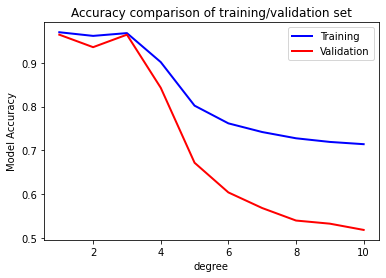

In [ ]:
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)
plt.plot(degree, mean_train_score, color="blue", linewidth=2, label="Training")
plt.plot(degree, mean_val_score, color="red", linewidth=2, label="Validation")
plt.legend(loc="upper right")
plt.xlabel("degree")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

In [ ]:
## the above figures shows the model with poly as kernel can make a model with high accuracy when the degree is three.

In [ ]:

kernel = ['rbf','poly','linear']

train_scores, valid_scores = validation_curve( pipeline_svm, x_train, y_train, param_name="poly_svm__kernel", param_range=kernel,
    cv=10, scoring="accuracy")

#Size of train_scores will be: length of parameter (max_depth_range) X number of folds
print(train_scores.shape)

(3, 10)


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

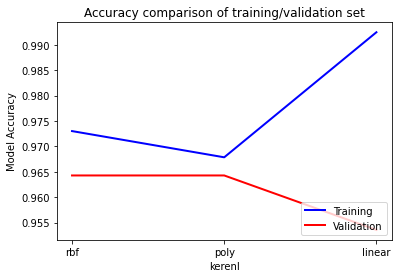

In [ ]:
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)
plt.plot(kernel, mean_train_score, color="blue", linewidth=2, label="Training")
plt.plot(kernel, mean_val_score, color="red", linewidth=2, label="Validation")
plt.legend(loc="lower right")
plt.xlabel("kerenl")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

**The figure shows poly kernel could be a good choice for high accuracy**

**Best Optimized model for support vector machine**

In [ ]:
pipeline_svm_op = Pipeline(steps=[
  ('preprocessor', preprocessor),
  #('model', model_svm)
   ('linear_svm', SVC(kernel='linear',gamma=1e-2,degree=8,C=1e-2))
])

In [ ]:
pipeline_svm_op.fit(x_train,y_train)

In [ ]:
y_predict = pipeline_svm_op.predict(x_test)

In [ ]:
## accuracy score
print(accuracy_score(y_test,y_predict))

0.9666666666666667


In [ ]:
# confusion matrix
print ( confusion_matrix(y_test,y_predict))

[[72  4]
 [ 0 44]]


In [ ]:
## f1_score
print (f1_score(y_test,y_predict,average=None, labels=['ckd','notckd']))

[0.97297297 0.95652174]


In [ ]:
scores = cross_val_score(pipeline_svm_op,x,y,cv=10)
scores

array([1.   , 0.95 , 0.95 , 1.   , 0.8  , 0.975, 0.975, 1.   , 1.   ,
       1.   ])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.12)


**K-nearest model**

In [ ]:
pipeline_knn = Pipeline(steps=[
  ('preprocessor', preprocessor),
  #('model', model_svm)
   ('knn_model', KNeighborsClassifier(n_neighbors=3))
])

In [ ]:
pipeline_knn.fit(x_train,y_train)

In [ ]:
n_neighbors = [3,5,10,20]
weights = ['uniform','distance']
metrics = ['euclidean','manhattan','chebyshev','minkowski']
leaf_size =[30,40,100]
n_jobs = range (1,11)

In [ ]:
param_grid = {'knn_model__weights':weights, 'knn_model__metric':metrics,'knn_model__n_neighbors':n_neighbors,'knn_model__leaf_size':leaf_size
              ,'knn_model__n_jobs':n_jobs}

In [ ]:
rand = RandomizedSearchCV(pipeline_knn,param_distributions=param_grid,cv=10, n_iter=10,scoring='accuracy')
rand.fit(x_train,y_train)

In [ ]:
rand_df = pd.DataFrame(rand.cv_results_)
max_value =  rand_df.loc[(rand_df.mean_test_score == max(rand_df.mean_test_score))  ]
max_value

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn_model__weights,param_knn_model__n_neighbors,param_knn_model__n_jobs,param_knn_model__metric,param_knn_model__leaf_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.030236,0.012061,0.045721,0.015432,distance,3,7,manhattan,100,"{'knn_model__weights': 'distance', 'knn_model_...",0.892857,0.928571,0.964286,0.857143,0.964286,0.964286,1.0,0.928571,0.857143,0.928571,0.928571,0.045175,1
6,0.007669,0.000093,0.008227,0.000104,uniform,10,2,euclidean,30,"{'knn_model__weights': 'uniform', 'knn_model__...",0.964286,0.928571,0.964286,0.857143,1.000000,0.964286,1.0,0.892857,0.857143,0.857143,0.928571,0.055328,1
9,0.007842,0.000226,0.036283,0.075904,uniform,10,4,minkowski,30,"{'knn_model__weights': 'uniform', 'knn_model__...",0.964286,0.928571,0.964286,0.857143,1.000000,0.964286,1.0,0.892857,0.857143,0.857143,0.928571,0.055328,1


In [ ]:
n_neighbors = range(3,11)

train_scores, valid_scores = validation_curve( pipeline_knn, x_train, y_train, param_name="knn_model__n_neighbors", param_range=n_neighbors,
    cv=10, scoring="accuracy")

#Size of train_scores will be: length of parameter (max_depth_range) X number of folds
print(train_scores.shape)

(8, 10)


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

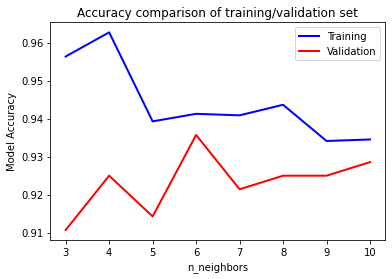

In [ ]:
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)
plt.plot(n_neighbors, mean_train_score, color="blue", linewidth=2, label="Training")
plt.plot(n_neighbors, mean_val_score, color="red", linewidth=2, label="Validation")
plt.legend(loc="upper right")
plt.xlabel("n_neighbors")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

##### The above figure shows  validation set has better accuracy by initializing n_neighbors = 6

In [ ]:
pipeline_knn_N = Pipeline(steps=[
  ('preprocessor', preprocessor),
  #('model', model_svm)
   ('knn_model', KNeighborsClassifier(n_neighbors=6))
])

In [ ]:
pipeline_knn_N.fit(x_train,y_train)

In [ ]:
print(accuracy_score(y_test,pipeline_knn_N.predict(x_test)))

0.9166666666666666


In [ ]:
metrics = ['euclidean','manhattan','chebyshev','minkowski']

train_scores, valid_scores = validation_curve( pipeline_knn, x_train, y_train, param_name="knn_model__metric", param_range=metrics,
    cv=10, scoring="accuracy")

#Size of train_scores will be: length of parameter (max_depth_range) X number of folds
print(train_scores.shape)

(4, 10)


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

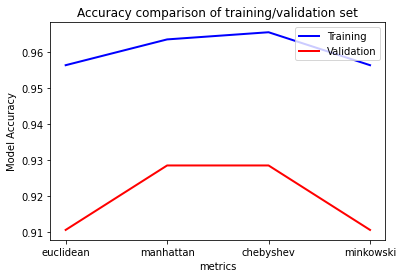

In [ ]:
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)
plt.plot(metrics, mean_train_score, color="blue", linewidth=2, label="Training")
plt.plot(metrics, mean_val_score, color="red", linewidth=2, label="Validation")
plt.legend(loc="upper right")
plt.xlabel("metrics")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

In [ ]:
## it shows the model is more optimized if we consider manhattan or chebyshev as distance metrics.

**Best Optimized  for k-nearest neighbor model based on RandomSearchcv result**

In [ ]:
pipeline_knn_op = Pipeline(steps=[
  ('preprocessor', preprocessor),
  #('model', model_svm)
   ('knn_model', KNeighborsClassifier(n_neighbors=3,leaf_size=100,metric='manhattan',n_jobs=7))
])

In [ ]:
pipeline_knn_op.fit(x_train,y_train)

In [ ]:
y_pred_knn  = pipeline_knn_op.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred_knn))

0.9333333333333333


In [ ]:
print(f1_score(y_test,y_pred_knn,average=None))

[0.94444444 0.91666667]


In [ ]:
print(confusion_matrix(y_test,y_pred_knn))

[[68  8]
 [ 0 44]]


In [ ]:
scores = cross_val_score(pipeline_knn_op,x,y,cv=10)
scores

array([0.975, 0.95 , 0.95 , 1.   , 0.825, 1.   , 0.925, 0.9  , 0.925,
       0.975])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.10)


**Decision Tree pipleline models**

In [ ]:
pipeline_tree = Pipeline(steps=[
  ('preprocessor', preprocessor),
   ('tree_model', DecisionTreeClassifier())
])

In [ ]:
pipeline_tree.fit(x_train,y_train)

In [ ]:
## metrics and range of values 
ccp_alpha = [ i for i in np.arange(0.00,0.30,0.01)]
max_depth_range = range(1,11)

In [ ]:
param_grid = {'tree_model__ccp_alpha':ccp_alpha, 'tree_model__max_depth':max_depth_range}

In [ ]:
rand = RandomizedSearchCV(pipeline_tree,param_distributions=param_grid,cv=10, n_iter=10,scoring='accuracy')
rand.fit(x_train,y_train)

In [ ]:
rand_df = pd.DataFrame(rand.cv_results_)
max_value =  rand_df.loc[(rand_df.mean_test_score == max(rand_df.mean_test_score))  ]
max_value

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree_model__max_depth,param_tree_model__ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008578,0.001942,0.003327,0.000327,9,0.02,"{'tree_model__max_depth': 9, 'tree_model__ccp_...",1.0,0.964286,1.0,1.0,1.0,0.857143,1.0,0.964286,0.857143,0.928571,0.957143,0.054865,1
3,0.007917,0.000185,0.003182,0.000072,9,0.06,"{'tree_model__max_depth': 9, 'tree_model__ccp_...",1.0,0.964286,1.0,1.0,1.0,0.857143,1.0,0.964286,0.857143,0.928571,0.957143,0.054865,1
7,0.008629,0.000819,0.003486,0.000542,5,0.08,"{'tree_model__max_depth': 5, 'tree_model__ccp_...",1.0,0.964286,1.0,1.0,1.0,0.857143,1.0,0.964286,0.857143,0.928571,0.957143,0.054865,1


In [ ]:
max_depth_range = range(1,11)

train_scores, valid_scores = validation_curve( pipeline_tree, x_train, y_train, param_name="tree_model__max_depth", param_range=max_depth_range,
    cv=10, scoring="accuracy")

#Size of train_scores will be: length of parameter (max_depth_range) X number of folds
print(train_scores.shape)

(10, 10)


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

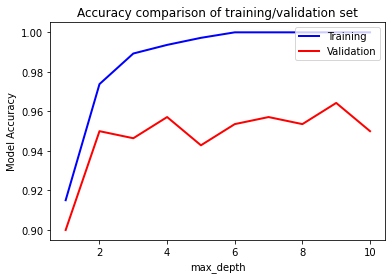

In [ ]:
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)
plt.plot(max_depth_range, mean_train_score, color="blue", linewidth=2, label="Training")
plt.plot(max_depth_range, mean_val_score, color="red", linewidth=2, label="Validation")
plt.legend(loc="upper right")
plt.xlabel("max_depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

In [ ]:
## the above figure shows the max_depth=9 has the best score for validation_set 
pipeline_tree_max_depth = Pipeline(steps=[
  ('preprocessor', preprocessor),
   ('tree_model', DecisionTreeClassifier(max_depth=9))
])

In [ ]:
pipeline_tree_max_depth.fit(x_train,y_train)

In [ ]:
print(accuracy_score(y_test,pipeline_tree_max_depth.predict(x_test)))

0.975


In [ ]:
ccp_alpha = [ i for i in np.arange(0.00,0.30,0.01)]

train_scores, valid_scores = validation_curve( pipeline_tree, x_train, y_train, param_name="tree_model__ccp_alpha", param_range=ccp_alpha,
    cv=10, scoring="accuracy")

#Size of train_scores will be: length of parameter (max_depth_range) X number of folds
print(train_scores.shape)

(30, 10)


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

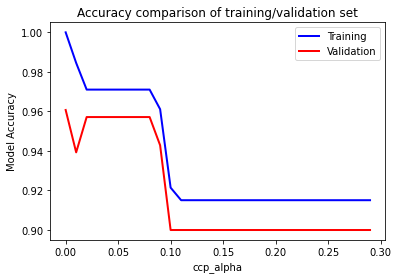

In [ ]:
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)
plt.plot(ccp_alpha, mean_train_score, color="blue", linewidth=2, label="Training")
plt.plot(ccp_alpha, mean_val_score, color="red", linewidth=2, label="Validation")
plt.legend(loc="upper right")
plt.xlabel("ccp_alpha")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

In [ ]:
## above figures shows initializing ccp_alpha=0.01 we could get the highest accuracy. make a model with it 
pipeline_tree_ca = Pipeline(steps=[
  ('preprocessor', preprocessor),
   ('tree_model', DecisionTreeClassifier(max_depth=3,ccp_alpha=0.01))
])
pipeline_tree_ca.fit(x_train,y_train)
print(f1_score(y_test,pipeline_tree_ca.predict(x_test),average=None))

[0.99337748 0.98876404]


**optimized model for Decision Tree based on combination of hyperparameters in RandsearchCV** with max_depth=9 and ccp_alpha=0.02

In [ ]:
pipeline_tree_op = Pipeline(steps=[
  ('preprocessor', preprocessor),
   ('tree_model', DecisionTreeClassifier(max_depth=9,ccp_alpha=0.02))
])

In [ ]:
pipeline_tree_op.fit(x_train,y_train)

In [ ]:
y_pred_tree = pipeline_tree_op.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred_tree))

0.9916666666666667


In [ ]:
print(f1_score(y_test,y_pred_tree,average=None))

[0.99337748 0.98876404]


In [ ]:
 print(confusion_matrix(y_test,y_pred_tree))

[[75  1]
 [ 0 44]]


In [ ]:
scores = cross_val_score(pipeline_tree_op,x,y,cv=10)
scores

array([0.95 , 0.975, 1.   , 0.975, 0.925, 0.95 , 1.   , 0.95 , 1.   ,
       0.95 ])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.05)


**RandomForest models pipeline**

In [ ]:
## The hyperparameters I have worked on them   for tunning : Max_depth,max_features,min_samples_leaf, min_samples_split and n-estimator

In [ ]:
pipeline_randomForest = Pipeline(steps=[
  ('preprocessor', preprocessor),
   ('Forest_model', RandomForestClassifier())
])

In [ ]:
pipeline_randomForest.fit(x_train,y_train)

In [ ]:
## range of values for hyperparameters are considered
max_depth=[3,7,8,9,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_features= ['auto', 'sqrt']
min_samples_leaf=[1, 2, 4]
min_samples_split= [2, 5, 10]
n_estimators=[50,100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [ ]:
param_grid = {'Forest_model__max_depth':max_depth,'Forest_model__max_features':max_features,
              'Forest_model__min_samples_leaf':min_samples_leaf,'Forest_model__min_samples_split':min_samples_split,
              'Forest_model__n_estimators':n_estimators}

In [ ]:
rand = RandomizedSearchCV(pipeline_randomForest,param_distributions=param_grid,cv=10, n_iter=10,scoring='accuracy')
rand.fit(x_train,y_train)

In [ ]:
rand_df = pd.DataFrame(rand.cv_results_)
max_value =  rand_df.loc[(rand_df.mean_test_score == max(rand_df.mean_test_score))  ]
max_value

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Forest_model__n_estimators,param_Forest_model__min_samples_split,param_Forest_model__min_samples_leaf,param_Forest_model__max_features,param_Forest_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
8,1.316855,0.010004,0.082652,0.024857,1200,2,1,auto,20,"{'Forest_model__n_estimators': 1200, 'Forest_m...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.928571,0.964286,0.989286,0.022868,1


In [ ]:
n_estimators = [ 50,100,200,300]

train_scores, valid_scores = validation_curve( pipeline_randomForest, x_train, y_train, param_name="Forest_model__n_estimators", param_range=n_estimators,
    cv=10, scoring="accuracy")

#Size of train_scores will be: length of parameter (max_depth_range) X number of folds
print(train_scores.shape)

(4, 10)


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

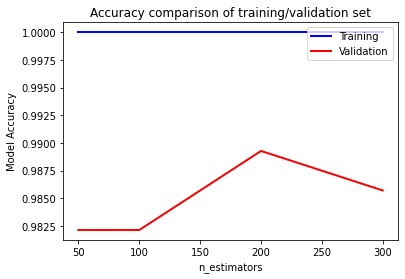

In [ ]:
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)
plt.plot(n_estimators, mean_train_score, color="blue", linewidth=2, label="Training")
plt.plot(n_estimators, mean_val_score, color="red", linewidth=2, label="Validation")
plt.legend(loc="upper right")
plt.xlabel("n_estimators")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

In [ ]:
## The above figure  shows at n_estimators=200 , the model has the highest accuracy
pipeline_randomForest_n_estimators = Pipeline(steps=[
  ('preprocessor', preprocessor),
   ('Forest_model', RandomForestClassifier(n_estimators=200))
])

In [ ]:
pipeline_randomForest_n_estimators.fit(x_train,y_train)

In [ ]:
print(accuracy_score(y_test,pipeline_randomForest_n_estimators.predict(x_test)))

1.0


In [ ]:
max_depth = range (1,21)

train_scores, valid_scores = validation_curve( pipeline_randomForest, x_train, y_train, param_name="Forest_model__max_depth", param_range=max_depth,
    cv=10, scoring="accuracy")

#Size of train_scores will be: length of parameter (max_depth_range) X number of folds
print(train_scores.shape)

(20, 10)


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

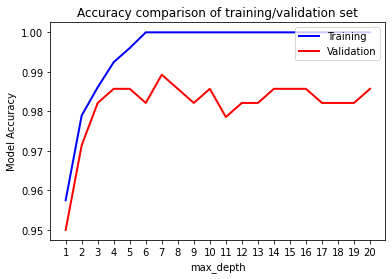

In [ ]:
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)
plt.plot(max_depth, mean_train_score, color="blue", linewidth=2, label="Training")
plt.plot(max_depth, mean_val_score, color="red", linewidth=2, label="Validation")
plt.legend(loc="upper right")
plt.xlabel("max_depth")
plt.xticks(range(1,21))
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

In [ ]:
## The highest accuracy for validation data happens when max_depth=7
pipeline_randomForest_max_depth = Pipeline(steps=[
  ('preprocessor', preprocessor),
   ('Forest_model', RandomForestClassifier(max_depth=7))
])

In [ ]:
pipeline_randomForest_max_depth.fit(x_train,y_train)

In [ ]:
print(accuracy_score(y_test,pipeline_randomForest_max_depth.predict(x_test)))

1.0


In [ ]:
##

min_samples_leaf=[1, 2, 4,6]

train_scores, valid_scores = validation_curve( pipeline_randomForest, x_train, y_train, param_name="Forest_model__min_samples_leaf", param_range=min_samples_leaf,
    cv=10, scoring="accuracy")

#Size of train_scores will be: length of parameter (max_depth_range) X number of folds
print(train_scores.shape)


(4, 10)


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

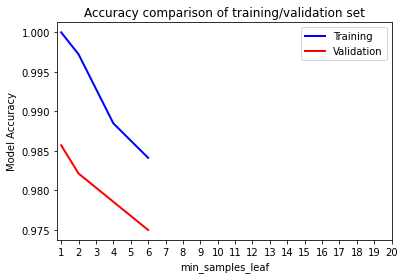

In [ ]:
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)
plt.plot(min_samples_leaf, mean_train_score, color="blue", linewidth=2, label="Training")
plt.plot(min_samples_leaf, mean_val_score, color="red", linewidth=2, label="Validation")
plt.legend(loc="upper right")
plt.xlabel("min_samples_leaf")
plt.xticks(range(1,21))
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

In [ ]:
## The figure shows choosing min_samples_leaf with one would be the best value for optimizing the model.

**Best optimized model for RandomForest based on RandomizesearchCV**

In [ ]:
pipeline_randomForest_op = Pipeline(steps=[
  ('preprocessor', preprocessor),
   ('Forest_model', RandomForestClassifier(n_estimators=1200,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=20))
])

In [ ]:
pipeline_randomForest_op.fit(x_train,y_train)

In [ ]:
y_pred_randomForest = pipeline_randomForest_op.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred_randomForest))

1.0


In [ ]:
print(confusion_matrix(y_test,y_pred_randomForest))

[[76  0]
 [ 0 44]]


In [ ]:
print(f1_score(y_test,y_pred_randomForest,average=None))

[1. 1.]


**Cross validation scores for optimized random forest model** 

In [ ]:
scores= cross_val_score(pipeline_randomForest_op,x,y,cv=10)
scores

array([1.   , 0.975, 1.   , 1.   , 0.95 , 0.975, 0.975, 1.   , 1.   ,
       1.   ])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.99 (+/- 0.03)


model|accuracy_score | mean_score for cross validation with considering std
---|---|---
suppprt vector machine|0.9666666666666667| 0.97 (+/- 0.12)
K_nearest neighbours|0.9333333333333333| 0.94 (+/- 0.10)
Decison Tree |0.9916666666666667|0.97 (+/- 0.05)
Random Forest |1.0|  0.99 (+/- 0.03)

**Answer**: From the above table we could conclude making a model with random forest classifier lead to highest accuracy. it is predictable when we get a good accuracy rate in decision tree ( it occurs here) we could get a better  and higher  accuracy than decison tree  from Random forest algorithm.Because Random forest can handle overfitting and underfitting problems in decison tree effectively. I have also checked the validation score for optimized model of random forest which also high accuray for every fold.That model has high accuracy which does not usually  happen in real world. For improvin g a model in random forest algorithm I am trying to tune hyperparameters to make an optimized model. for example I will try to test how many number of trees in the forest should be considered (n_estimators) , number of features could be considered for splitting a node (max_features) ,or tune max_depth hyperparameter for considering number of levels in each decision tree.definitely checking the model for detecting overfiting and underfitting and tuning hyperparameters to prevent them  should always be considered to improve a model.